In [29]:
#DECLARACAO DE BIBLIOTECAS

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [18]:
#GERAÇÃO DE DADOS

N = 1000 
 
centers = [[-0.5, 0], [0, 1.5]]

x, y = make_blobs(n_samples=N, centers=centers, random_state=42)

x1 = x[:,0]
x2 = x[:,1]

x0 = np.ones((N,))
X = np.c_[x0,x1,x2]

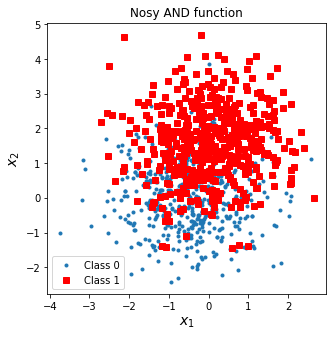

In [10]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rs', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Nosy AND function')
plt.legend()
plt.savefig('noisy_and_gate.png', dpi=600)
plt.show()

PERCEPTRON

In [27]:
#MODELO PERCEPTRON

per = Perceptron(random_state=42) 

per.fit(X,y)

y_pred = per.predict(X)

# Calculate and return the accuracy on the test data  

accuracy = accuracy_score(y, y_pred) 
 
print('accuracy: ', accuracy) 

accuracy:  0.769


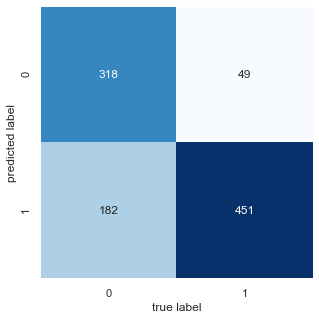

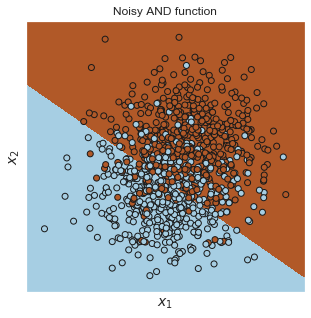

In [25]:
#PLOT MATRIZ DE CONFUSAO

# Plot the confusion matrix
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

#FRONTEIRA DE DECISAO

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = per.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Noisy AND function')
plt.savefig('noisy_and_gate_boundary.png', dpi=600)
plt.show()

REGRESSÃO LOGÍSTICA

In [30]:
#MODELO REGRESSÃO LOGÍSTICA

log = LogisticRegression(solver='lbfgs', random_state=42) 

log.fit(x,y)

y_pred_log = log.predict(x)

# Calculate and return the accuracy on the test data  

accuracy = accuracy_score(y, y_pred_log) 
 
print('accuracy: ', accuracy) 

accuracy:  0.797


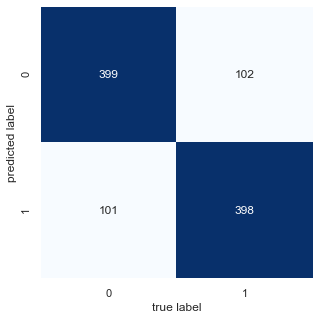

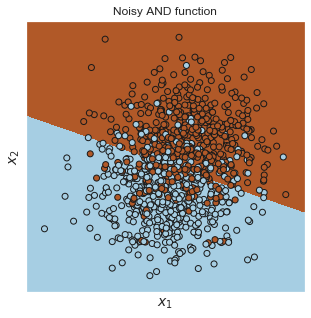

In [31]:
#PLOT MATRIZ DE CONFUSAO

# Plot the confusion matrix
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y, y_pred_log)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

#FRONTEIRA DE DECISAO

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = log.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Noisy AND function')
plt.savefig('noisy_and_gate_boundary.png', dpi=600)
plt.show()

In [ ]:
# O REGRESSOR LOGÍSTICO APRESENTA MELHOR PERFORMANCE DEVIDO A FUNÇÃO DE SEPARAÇÃO DE CLASSES NÃO SER UM DEGRAU UNITÁRIO.